<a href="https://colab.research.google.com/github/ekaratnida/Applied-machine-learning/blob/master/Week14-kmeans/K-means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

In [1]:
%matplotlib inline
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import pairwise_distances_argmin
import matplotlib.cm as cm
import seaborn as sns; sns.set()  # for plot styling

nc = 2

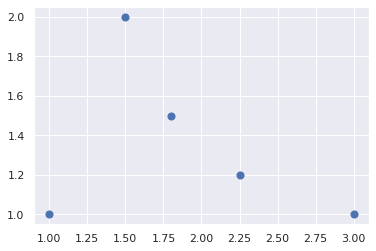

In [2]:

#X = np.array([[1, 2], [2, 1], [3, 3],
#              [8, 1.5], [9, 2], [10, 0]])

X = np.array([[1,1],[1.5,2],[1.8,1.5],[2.25,1.2],[3,1]])
plt.scatter(X[:, 0], X[:, 1], s=50);

In [3]:
kmeans = KMeans(n_clusters=nc, random_state=0).fit(X)

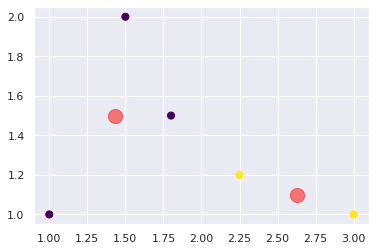

In [4]:
y_kmeans = kmeans.predict(X)
# get centroids
centers = kmeans.cluster_centers_

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

# K-Mean from scratch

a= [2 4 1 3 0]
centroids= [[1.8 1.5]
 [3.  1. ]]
labels =  [0 0 0 0 1]
new_centroids =  [[1.6375 1.425 ]
 [3.     1.    ]]
labels =  [0 0 0 0 1]
new_centroids =  [[1.6375 1.425 ]
 [3.     1.    ]]
centroids =  [[1.6375 1.425 ]
 [3.     1.    ]]
labels =  [0 0 0 0 1]


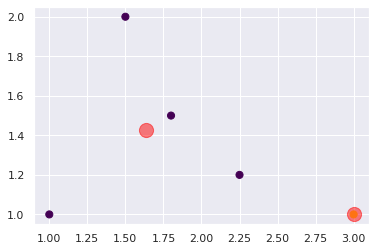

In [24]:
def find_clusters(X, n_clusters, rseed=2):
  
    # 1. Randomly choose centroids from exiting data points
    # Not a best way.
    rng = np.random.RandomState(rseed)
    a = rng.permutation(X.shape[0])
    print("a=",a)
    i = a[:n_clusters]
    centroids = X[i]
    print("centroids=",centroids)
    
    while True:
        # 2a. Assign labels based on closest centroids
        labels = pairwise_distances_argmin(X, centroids) #Compute minimum distances between one point and a set of points.
        print("labels = ",labels)
        
        # 2b. Find new centroids from means of points
        new_centroids = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        print("new_centroids = ",new_centroids)
        
        # 2c. Check for convergence
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    return centroids, labels

centroids, labels = find_clusters(X, n_clusters=nc)
print("centroids = ", centroids)
print("labels = ", labels)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5);

# silhouette analysis

For n_clusters = 2 The average silhouette_score is : 0.3388865453298869
For n_clusters = 3 The average silhouette_score is : 0.2793062061863677
For n_clusters = 4 The average silhouette_score is : 0.07514353252466117


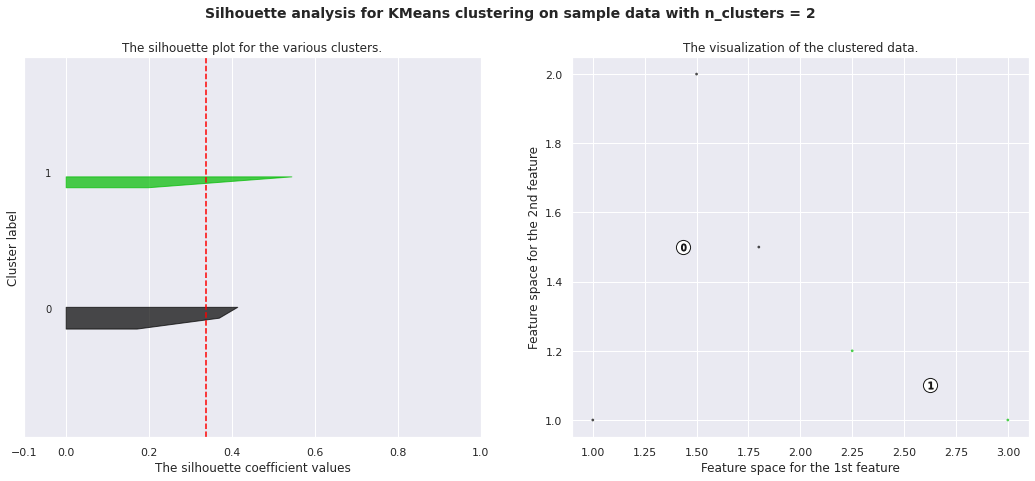

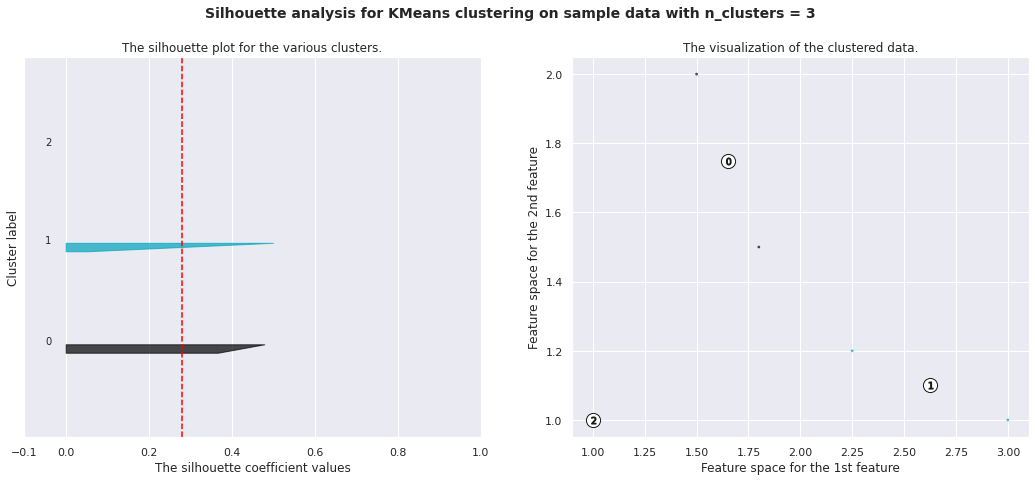

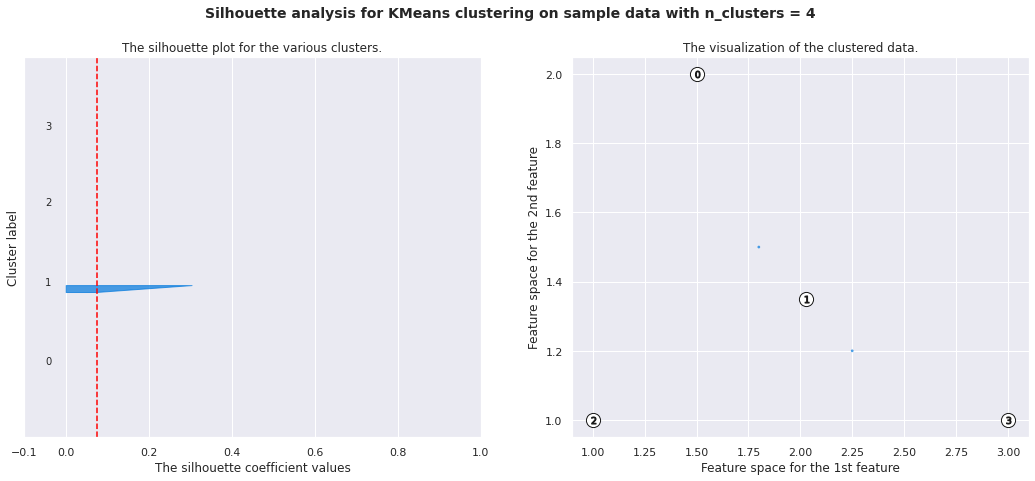

In [6]:
range_n_clusters = [2, 3, 4] # 1<clusters<m

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

# K-means Appplication (Color compression)

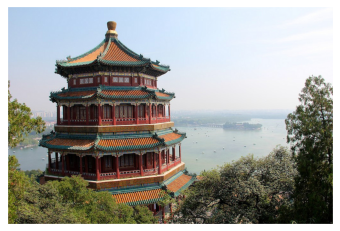

In [7]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

In [8]:
data = china / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [9]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    # Randomly permute a sequence, or return a permuted range.
    # If x is a multi-dimensional array, it is only shuffled along its first index.

    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N] # obtain only N numbers
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

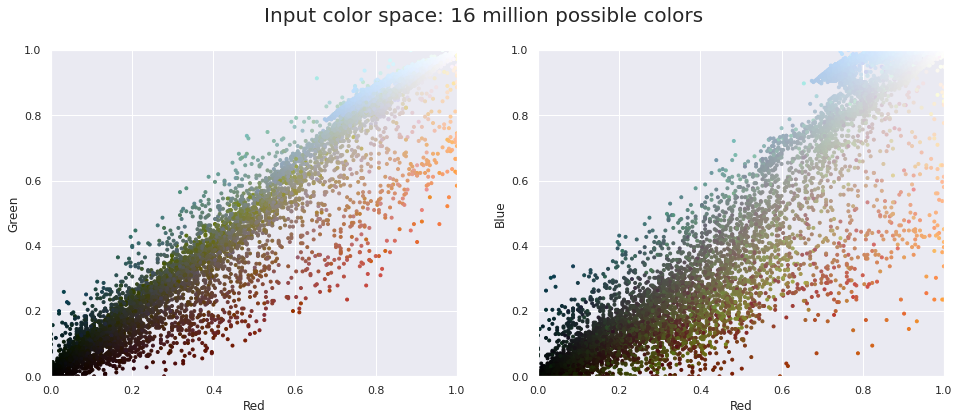

In [10]:
plot_pixels(data, title='Input color space: 16 million possible colors')

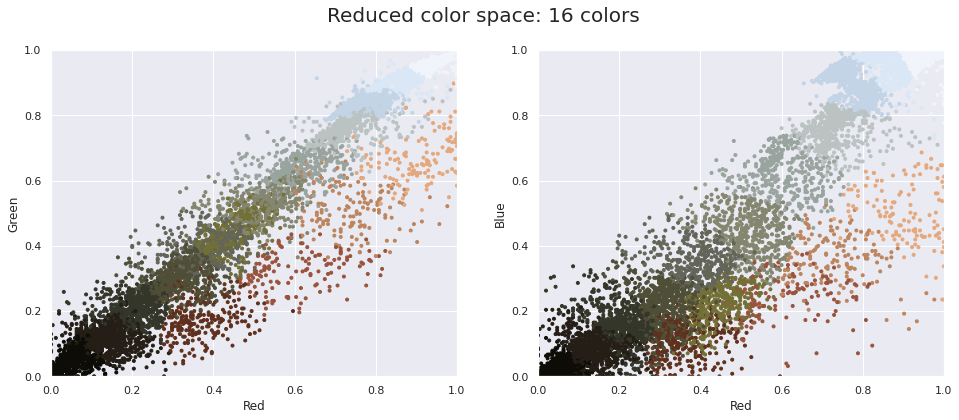

In [11]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
mbkmeans = MiniBatchKMeans(16)
mbkmeans.fit(data)
#print(mbkmeans.cluster_centers_)
new_colors = mbkmeans.cluster_centers_[mbkmeans.predict(data)]
plot_pixels(data, colors=new_colors, title="Reduced color space: 16 colors")

#https://www.eecs.tufts.edu/~dsculley/papers/fastkmeans.pdf

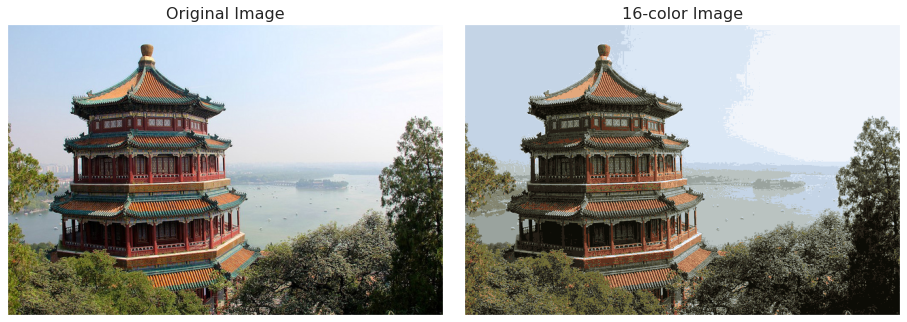

In [12]:
china_recolored = new_colors.reshape(china.shape)
fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);

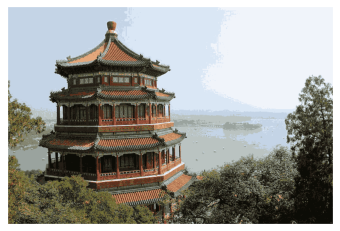

In [13]:
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china_recolored);

## Apply K-means to cluster this data 
https://github.com/ekaratnida/Applied-machine-learning/blob/master/Week14-kmeans/Mall_Customers.csv